# Installations

In [96]:
#!pip install scikit-learn pycaret

# Imports

In [97]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import time
import os
import joblib
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# machine learning - scikit learn:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Connexion BDD

In [98]:
# mount GoogleDrive and set the files path
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Projet Python - MOOC'

path = os.getcwd()
print(f"Le répertoire courant est : {path} \n")

url = "donnees_explo.csv"
df = pd.read_csv(url)#.sort_values(by = 'grade', ascending = False) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Projet Python - MOOC
Le répertoire courant est : /content/drive/MyDrive/Projet Python - MOOC 



In [99]:
df

,username,course_id,grade,gender,city,country,N
0,pigret,course-v1:amu+38001+session02,0.0,NaN,NaN,NaN,85680
1,nabla09,itii/119002/session01,0.0,NaN,NaN,NaN,55500
2,nabla09,course-v1:amu+38001+session02,0.0,NaN,NaN,NaN,45510
3,pigret,OBSPM/62002/session01,0.0,NaN,NaN,NaN,37944
4,nabla09,OBSPM/62002/session01,0.0,NaN,NaN,NaN,29970
...,...,...,...,...,...,...,...
252987,Isabellecharton,MinesTelecom/04017/session01,0.0,NaN,NaN,NaN,0
252988,sbasuyau,MinesTelecom/04017/session01,0.0,NaN,NaN,NaN,0
252989,ytimalac,MinesTelecom/04018S02/session02,0.0,NaN,NaN,NaN,0
252990,Waldo,CNAM/01002S04/session04,0.0,m,None,FR,0


# Définition des méthodes

In [100]:
def tauxDeRemplissage(df):
  return (df.notna().sum()*100/len(df)).sort_values()

In [101]:
def extract_jsonTab(tab, nb_vlue):
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    for elem in tab:
        x=0 
        vlue=[""] * nb_vlue
        for val in  elem:        
            val=val.replace("\n","")
            vlue[x]=val
            x+=1
        df1=pd.DataFrame([pd.Series(vlue)])
        # df1=pd.concat([df1,pd.DataFrame([[vlue[0],vlue[1]]])], ignore_index=True)
        df2= pd.concat([df2,df1], ignore_index=True)
            
    return df2

# Exploration des données

In [102]:
#df.drop_duplicates(subset="course_id", inplace=True)

In [103]:
print('====================================================')
df.info()
print('====================================================')
print(f"\n{tauxDeRemplissage(df)}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252992 entries, 0 to 252991
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   username   252992 non-null  object 
 1   course_id  252992 non-null  object 
 2   grade      252992 non-null  float64
 3   gender     56174 non-null   object 
 4   city       57094 non-null   object 
 5   country    44545 non-null   object 
 6   N          252992 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 13.5+ MB

country       17.607276
gender        22.203864
city          22.567512
username     100.000000
course_id    100.000000
grade        100.000000
N            100.000000
dtype: float64



In [104]:
df = df.drop(df[df["grade"] == 0].index)
df.drop_duplicates(subset=['username', 'course_id'], inplace=True)
df['cat'] = pd.cut(df.grade, bins=5)
df

,username,course_id,grade,gender,city,country,N,cat
14,JPBAUJOT,MinesTelecom/04017S02/session02,0.95,m,None,NaN,11781,"(0.802, 1.0]"
29,Bruno314,OBSPM/62002/session01,1.00,NaN,NaN,NaN,6084,"(0.802, 1.0]"
31,bgaultier,MinesTelecom/04017/session01,0.56,m,None,FR,5712,"(0.406, 0.604]"
36,FrancoiseS,MinesTelecom/04018/session01,0.92,f,None,FR,4986,"(0.802, 1.0]"
39,FrancoiseS,course-v1:MinesTelecom+04007S03+session03,0.30,f,None,FR,4709,"(0.208, 0.406]"
...,...,...,...,...,...,...,...,...
252965,bossartiste,course-v1:MinesTelecom+04017+session03,0.40,m,NaN,NaN,0,"(0.208, 0.406]"
252973,Labarretony,MinesTelecom/04017S02/session02,0.95,m,None,NaN,0,"(0.802, 1.0]"
252977,DREEPZ,course-v1:MinesTelecom+04004+session04,0.89,NaN,NaN,NaN,0,"(0.802, 1.0]"
252979,fleabite531,course-v1:BerkeleyX+EE40LX+2T2015,1.00,NaN,NaN,NaN,0,"(0.802, 1.0]"


In [105]:
px.box(df[df.N<50], y='N', color='cat' ) # course_id

<AxesSubplot:xlabel='N', ylabel='Density'>

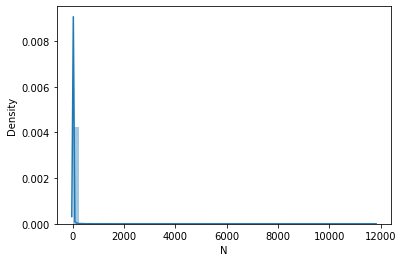

In [106]:
#sns.histplot(df.cat)
sns.distplot(df.N)

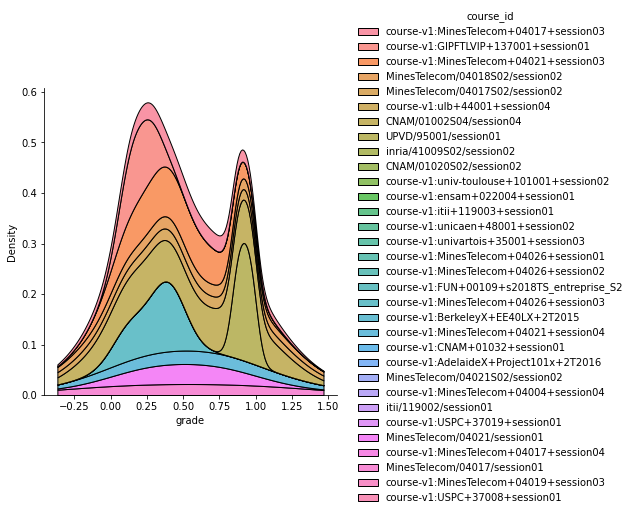

In [107]:
df_sample = df.sample(n=50, random_state=42)

# Créer le graphique avec l'échantillon de données
sns.displot(df_sample, x="grade", hue="course_id", kind="kde", multiple="stack")

# Modélisation

In [108]:
df_pour_prediction = df
print(f"\n{df_pour_prediction.columns}")
print(f"\n{df_pour_prediction.dtypes}\n")
print(f"{df_pour_prediction.shape}\n")


Index(['username', 'course_id', 'grade', 'gender', 'city', 'country', 'N',
       'cat'],
      dtype='object')

username       object
course_id      object
grade         float64
gender         object
city           object
country        object
N               int64
cat          category
dtype: object

(46328, 8)



In [109]:
df_pour_prediction = df_pour_prediction.replace('None', np.nan)
df_pour_prediction = df_pour_prediction.dropna()
df_pour_prediction = df_pour_prediction.astype({'username': str, 'course_id': str, 'grade': float, 'gender': str, 'city': str, 'country': str})
print(f"\n{df_pour_prediction.dtypes}\n")
df_pour_prediction


username       object
course_id      object
grade         float64
gender         object
city           object
country        object
N               int64
cat          category
dtype: object



,username,course_id,grade,gender,city,country,N,cat
109,_Patrick_,MinesTelecom/04012S03/session03,1.00,m,Metz,FR,2115,"(0.802, 1.0]"
159,SteveToulouse,MinesTelecom/04018/session01,0.98,m,Toulouse,FR,1392,"(0.802, 1.0]"
183,trx337,MinesTelecom/04018S02/session02,0.97,m,paris,FR,1159,"(0.802, 1.0]"
201,CatPiper,MinesTelecom/04017/session01,1.00,m,Auxonne,FR,1064,"(0.802, 1.0]"
261,tendre_aixois,MinesTelecom/04017S02/session02,0.63,m,Aix en Provence,FR,752,"(0.604, 0.802]"
...,...,...,...,...,...,...,...,...
252791,Naoumar,MinesTelecom/04018/session01,0.26,m,brest,FR,0,"(0.208, 0.406]"
252804,flolartiste,MinesTelecom/04021/session01,0.12,m,Lille,FR,0,"(0.00901, 0.208]"
252845,RGUILL,MinesTelecom/04017S02/session02,0.48,m,Bordeaux,FR,0,"(0.406, 0.604]"
252858,sonic1,MinesTelecom/04017/session01,1.00,m,01300,FR,0,"(0.802, 1.0]"


In [110]:
#Définition de notre X(données) et y(target) pour la prédiction du rating
y = df_pour_prediction['grade']
X = df_pour_prediction.drop(['N', 'grade', 'username', 'course_id', 'cat'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print("La longueur du dataset de base :", len(X))
print("La longueur du dataset d'entraînement :", len(X_train))
print("La longueur du dataset de test :", len(X_test))
X_train

La longueur du dataset de base : 10792
La longueur du dataset d'entraînement : 8094
La longueur du dataset de test : 2698


,gender,city,country
170904,m,Vénissieux,FR
37652,f,Dijon,FR
4443,m,Saint Quentin,FR
98926,m,Nantes,FR
82951,m,Metz,FR
...,...,...,...
220830,m,Waterloo,BE
171799,m,PENVENAN,FR
25156,m,abidjan,CI
171936,m,Paris,FR


In [111]:
preparation = ColumnTransformer(
    transformers=[
        ('data_cat', OneHotEncoder(handle_unknown='ignore'), ['gender']), 
        ('data_text', CountVectorizer(), 'country'),
        ('data_city', CountVectorizer(binary=True, stop_words='english'), 'city'),
        #('data_num', StandardScaler(), ['grade'])
    ])
preparation

ColumnTransformer(transformers=[('data_cat',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender']),
                                ('data_text', CountVectorizer(), 'country'),
                                ('data_city',
                                 CountVectorizer(binary=True,
                                                 stop_words='english'),
                                 'city')])

In [112]:
X_train_prepared = preparation.fit_transform(X_train)
X_test_prepared = preparation.transform(X_test)

In [113]:
# Créer un dictionnaire de modèles et de paramètres
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    #'KNeighborsRegressor': KNeighborsRegressor(),
}

params = {
    'LinearRegression': {'copy_X': [True, False],'fit_intercept': [True, False],'n_jobs': [-1, 1],'positive': [True, False]},
    'Ridge': {'alpha': [0.1, 1, 10],'fit_intercept': [True, False]},
    'Lasso': {'alpha': [0.1, 1, 10],'fit_intercept': [True, False]},
    'ElasticNet': {'alpha': [0.1, 1, 10],'l1_ratio': [0.25, 0.5, 0.75],'fit_intercept': [True, False]},
    'RandomForestRegressor': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10]},
    #'KNeighborsRegressor': {'n_neighbors': [3, 5, 7]},
}

In [114]:
# Créer un objet GridSearchCV avec le dictionnaire de modèles et de paramètres
p=0
for model_name, model in models.items():
    p=p+1
    print(f"\n-----------------------------Modèle {p}---------------------------------\n")
    print(f"GridSearchCV for {model_name}")
    start_time = time.time()
    gs = GridSearchCV(model, params[model_name], cv=5)
    gs.fit(X_train_prepared, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Best params: {gs.best_params_}")
    print(f"Train score: {gs.best_score_*100:.3f}%")
    print(f"Test score: {gs.score(X_test_prepared, y_test)*100:.3f}%\n")    
    print(f"\n------------------------------------------------------- {training_time:.2f} seconds")


-----------------------------Modèle 1---------------------------------

GridSearchCV for LinearRegression
Best params: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}
Train score: -9.194%
Test score: -10.263%


------------------------------------------------------- 12.19 seconds

-----------------------------Modèle 2---------------------------------

GridSearchCV for Ridge
Best params: {'alpha': 10, 'fit_intercept': True}
Train score: 8.264%
Test score: 7.824%


------------------------------------------------------- 0.65 seconds

-----------------------------Modèle 3---------------------------------

GridSearchCV for Lasso
Best params: {'alpha': 0.1, 'fit_intercept': True}
Train score: -0.078%
Test score: -0.045%


------------------------------------------------------- 0.68 seconds

-----------------------------Modèle 4---------------------------------

GridSearchCV for ElasticNet
Best params: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25}
Train s

In [115]:
best_model = gs.best_estimator_
joblib.dump(best_model, 'best_model.joblib') 
joblib.dump(preparation, 'preparation.joblib') 

['preparation.joblib']

In [116]:
 # Charger le meilleur modèle à partir du fichier
best_model = joblib.load('best_model.joblib')
best_prep = joblib.load('preparation.joblib')

In [117]:
    input_data = {
        'city': 'Metz',
        'country': 'fr',
        'gender': 'm',
    }
    
    # Convertir les éléments d'entrée en dataframe
    input_df = pd.DataFrame([input_data])
    
    # Préparer les données d'entrée
    input_prepared = best_prep.transform(input_df)
    
    # Faire la prédiction
    prediction = best_model.predict(input_prepared)
    
    print(f"La prédiction de rating est : {prediction[0]:.2f}")

La prédiction de rating est : 0.57
